In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS

from textblob import TextBlob



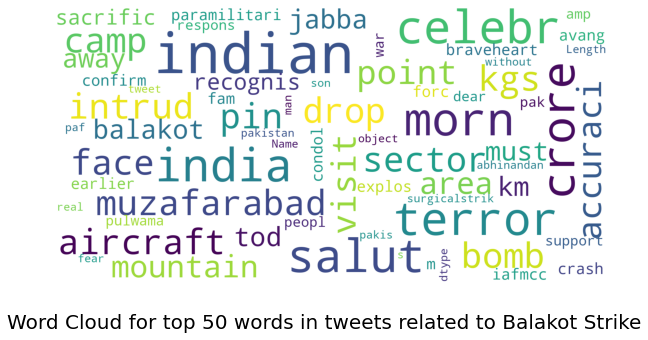

In [162]:
word_cloud = WordCloud(
                    background_color='white',
                    stopwords=set(STOPWORDS),
                    max_words=1000,
                    max_font_size=40,
                    scale=5,
                    random_state=1).generate(str(df2['tweet']))
fig = plt.figure(1, figsize=(10,10))
plt.axis('off')
fig.suptitle('Word Cloud for top 50 words in tweets related to Balakot Strike', fontsize=20)
fig.subplots_adjust(top=2.3)
plt.imshow(word_cloud)
plt.show()

In [35]:
def cleantwt (twt):
  emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)

  twt = re.sub('RT', '', twt) # remove 'RT' from tweets
  twt = re.sub('#[A-Za-z0-9]+', '', twt) # remove the '#' from the tweets
  twt = re.sub('\\n', '', twt) # remove the '\n' character
  twt = re.sub('https?:\/\/\S+', '', twt) # remove the hyperlinks
  twt = re.sub('@[\S]*', '', twt) # remove @mentions
  twt = re.sub('^[\s]+|[\s]+$', '', twt) # remove leading and trailing whitespaces
  twt = re.sub(emoj, '', twt) # remove emojis
  return twt

In [40]:
#Create a function to get the subjectivity
def getSubjectivity(twt):
  return TextBlob(twt).sentiment.subjectivity

#Create a function to get the polarity
def getPolarity(twt):
  return TextBlob(twt).sentiment.polarity

In [42]:
# Creating a function to classify or label the sentiments as negative, positive and neutral
def getSentiment(value):
  if value < 0:
    return 'Negative'
  elif value > 0:
    return 'Positive'
  else:
    return 'Neutral'

In [48]:
import nltk

In [89]:
df2 = pd.read_csv(r"C:/Users/pk/Projects/balakot/public.csv")

In [64]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('\r', ' ', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

In [90]:
df2['tweet'] = df2['text'].apply(clean)

In [57]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [59]:
sentiments = SentimentIntensityAnalyzer()

In [75]:
def getSubjectivity(twt):
  return TextBlob(twt).sentiment.subjectivity
def getPolarity(twt):
  return TextBlob(twt).sentiment.polarity
# Creating a function to classify or label the sentiments as negative, positive and neutral according to textblob
def getBlobSentiment(value):
  if value < 0:
    return 'Negative'
  elif value > 0:
    return 'Positive'
  else:
    return 'Neutral'



In [209]:
def getVaderScores(tweet):
    return pd.Series(SentimentIntensityAnalyzer().polarity_scores(tweet))
    

def getVaderSentiment(value):
    if value  >= 0.05:
        return "Positive"
    elif value <= -0.05:
        return "Negative"
    else:
        return "Neutral"


In [124]:
getVaderScores(df2['tweet'][0])

neg         0.0
neu         1.0
pos         0.0
compound    0.0
dtype: float64

In [102]:
df2[['neg','neu','pos','compound']] = df2['tweet'].apply(getVaderScores)



In [211]:
df2["vadersentiment"] = df2['compound'].apply(getVaderSentiment)

In [104]:
df2["subjectivity"] = df2["tweet"].apply(getSubjectivity)

df2["polarity"] = df2["tweet"].apply(getPolarity)

df2["blobSentiment"] = df2["polarity"].apply(getBlobSentiment)

In [212]:
df2.head()

Unnamed: 0                                               text  \
0        4758  Indian aircrafts intruded from Muzafarabad sec...   
1        6693  1000 kgs bombs dropped on terror camps with pi...   
2       53217  I visited mountain area of Jabba 25 km away fr...   
3        1645  We must recognise the sacrifices of our parami...   
4       20358  What an explosive morning ! As india celebrate...   

     user_username              source                created_at  \
0   OfficialDGISPR    Twitter for iPad  2019-02-26T01:36:30.000Z   
1  majorgauravarya  Twitter for iPhone  2019-02-26T03:49:02.000Z   
2      HamidMirPAK  Twitter for iPhone  2019-02-27T09:38:38.000Z   
3      RahulGandhi  Twitter for iPhone  2019-02-25T08:15:27.000Z   
4    TandonRaveena  Twitter for iPhone  2019-02-26T06:30:04.000Z   

                 user_location                 user_name  retweet_count  \
0                     Pakistan                   DG ISPR          10406   
1                        India  Major Gaurav Arya (Retd)          10404   
2          Islamabad, Pakistan                 Hamid Mir           8184   
3  12, Tughlak Lane, New Delhi              Rahul Gandhi           7520   
4                 Planet Earth            Raveena Tandon           3465   

   like_count  quote_count  ...  \
0       40211         2685  ...   
1       34533          669  ...   
2       28732         1178  ...   
3       25055          450  ...   
4       21943          153  ...   

                                               tweet    neg    neu    pos  \
0  indian aircraft intrud muzafarabad sector face...  0.000  1.000  0.000   
1   kgs bomb drop terror camp pin point accuraci ...  0.500  0.413  0.087   
2  visit mountain area jabba  km away balakot tod...  0.348  0.652  0.000   
3  must recognis sacrific paramilitari forc like ...  0.041  0.557  0.402   
4  explos morn  india celebr  salut  braveheart m...  0.291  0.618  0.091   

  compound  vadersentiment  subjectivity  polarity  blobSentiment  \
0   0.0000         Neutral      0.400000  0.100000       Positive   
1  -0.9432        Negative      0.289286 -0.353571       Negative   
2  -0.8625        Negative      0.400000 -0.200000       Negative   
3   0.9062        Positive      0.500000  0.500000       Positive   
4  -0.6705        Negative      0.050000 -0.075000       Negative   

                                           temp_list  
0  [indian, aircraft, intrud, muzafarabad, sector...  
1  [kgs, bomb, drop, terror, camp, pin, point, ac...  
2  [visit, mountain, area, jabba, km, away, balak...  
3  [must, recognis, sacrific, paramilitari, forc,...  
4  [explos, morn, india, celebr, salut, bravehear...  

[5 rows x 24 columns]

In [106]:
df2.columns

Index(['Unnamed: 0', 'text', 'user_username', 'source', 'created_at',
       'user_location', 'user_name', 'retweet_count', 'like_count',
       'quote_count', 'user_tweet_count', 'user_list_count',
       'user_followers_count', 'user_following_count', 'tweet', 'neg', 'neu',
       'pos', 'compound', 'vadersentiment', 'subjectivity', 'polarity',
       'blobSentiment'],
      dtype='object')

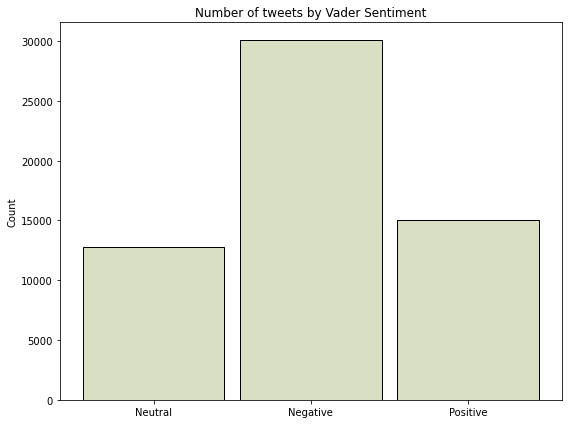

In [213]:
plt.figure(figsize = (8,6))

sns.histplot(df2, x = 'vadersentiment', color = '#ccd5ae', shrink = 0.9).set(xlabel = None)
plt.title('Number of tweets by Vader Sentiment')

plt.tight_layout()

In [224]:
vPositive = df2[df2['blobSentiment']=='Positive']
vNegative = df2[df2['blobSentiment']=='Negative']
vNeutral = df2[df2['blobSentiment']=='Neutral']

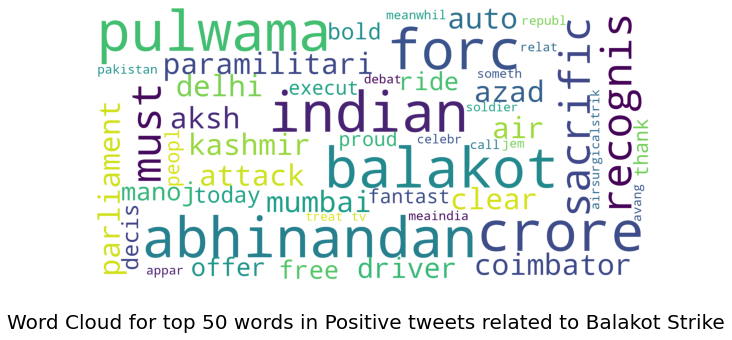

In [215]:
word_cloud = WordCloud(
                    background_color='white',
                    stopwords=set(STOPWORDS),
                    max_words=50,
                    max_font_size=40,
                    scale=5,
                    random_state=1).generate(str(vPositive['tweet']))
fig = plt.figure(1, figsize=(10,10))
plt.axis('off')
fig.suptitle('Word Cloud for top 50 words in Positive tweets related to Balakot Strike', fontsize=20)
fig.subplots_adjust(top=2.3)
plt.imshow(word_cloud)
plt.show()

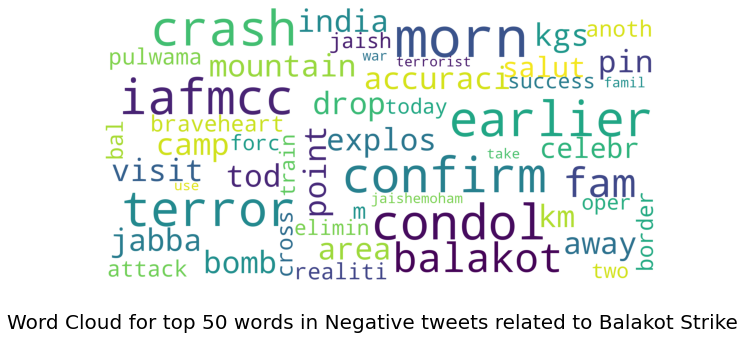

In [216]:
word_cloud = WordCloud(
                    background_color='white',
                    stopwords=set(STOPWORDS),
                    max_words=50,
                    max_font_size=40,
                    scale=5,
                    random_state=1).generate(str(vNegative['tweet']))
fig = plt.figure(1, figsize=(10,10))
plt.axis('off')
fig.suptitle('Word Cloud for top 50 words in Negative tweets related to Balakot Strike', fontsize=20)
fig.subplots_adjust(top=2.3)
plt.imshow(word_cloud)
plt.show()

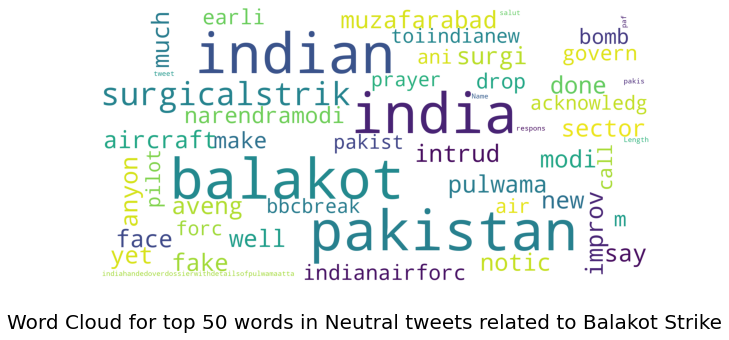

In [217]:
word_cloud = WordCloud(
                    background_color='white',
                    stopwords=set(STOPWORDS),
                    max_words=50,
                    max_font_size=40,
                    scale=5,
                    random_state=1).generate(str(vNeutral['tweet']))
fig = plt.figure(1, figsize=(10,10))
plt.axis('off')
fig.suptitle('Word Cloud for top 50 words in Neutral tweets related to Balakot Strike', fontsize=20)
fig.subplots_adjust(top=2.3)
plt.imshow(word_cloud)
plt.show()

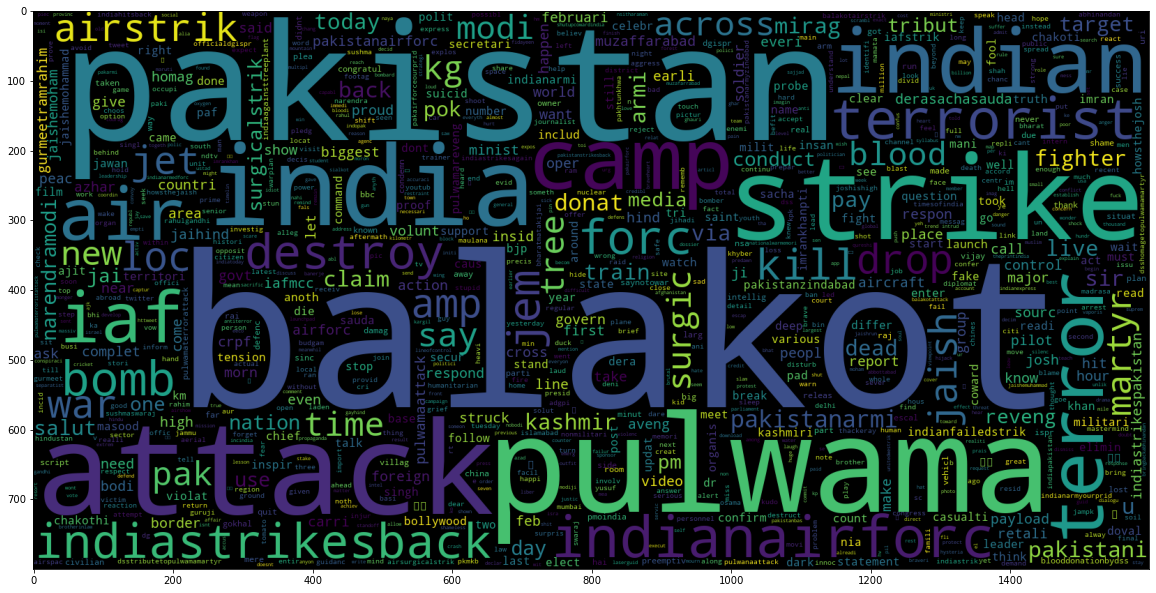

In [218]:
data_neg = vNegative['tweet']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

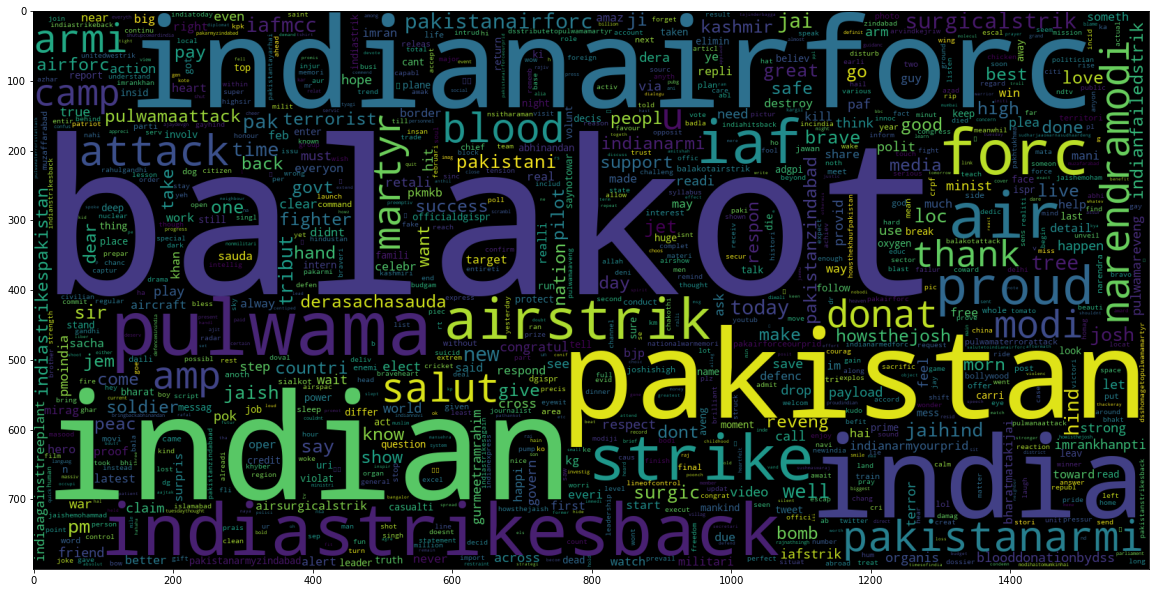

In [172]:
data_pos = vPositive['tweet']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_pos))
plt.imshow(wc)

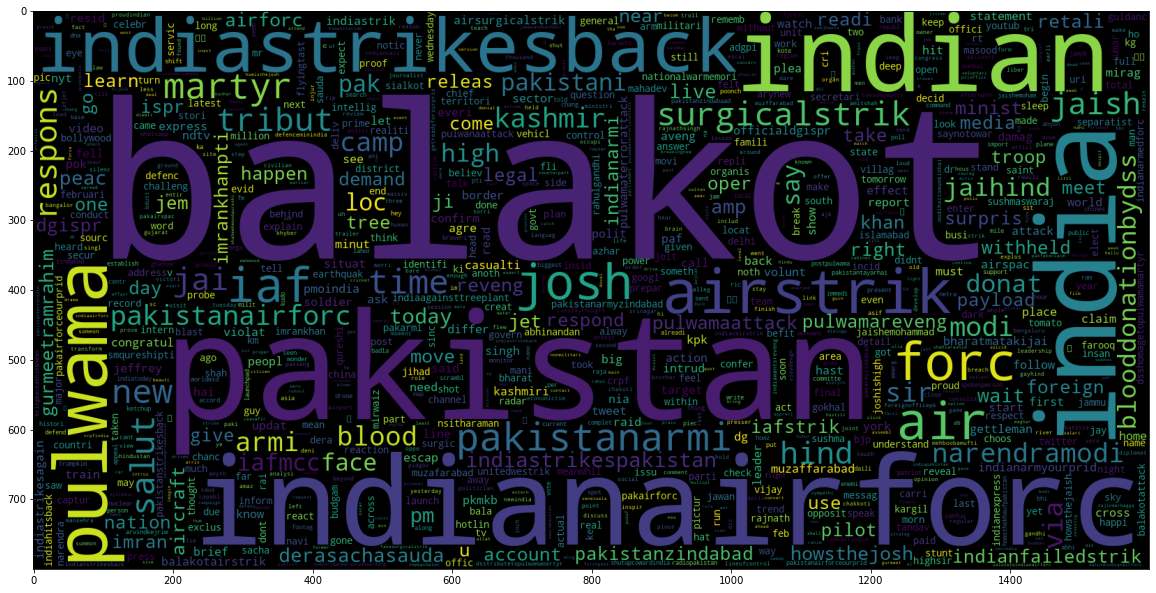

In [173]:
data_neu = vNeutral['tweet']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neu))
plt.imshow(wc)

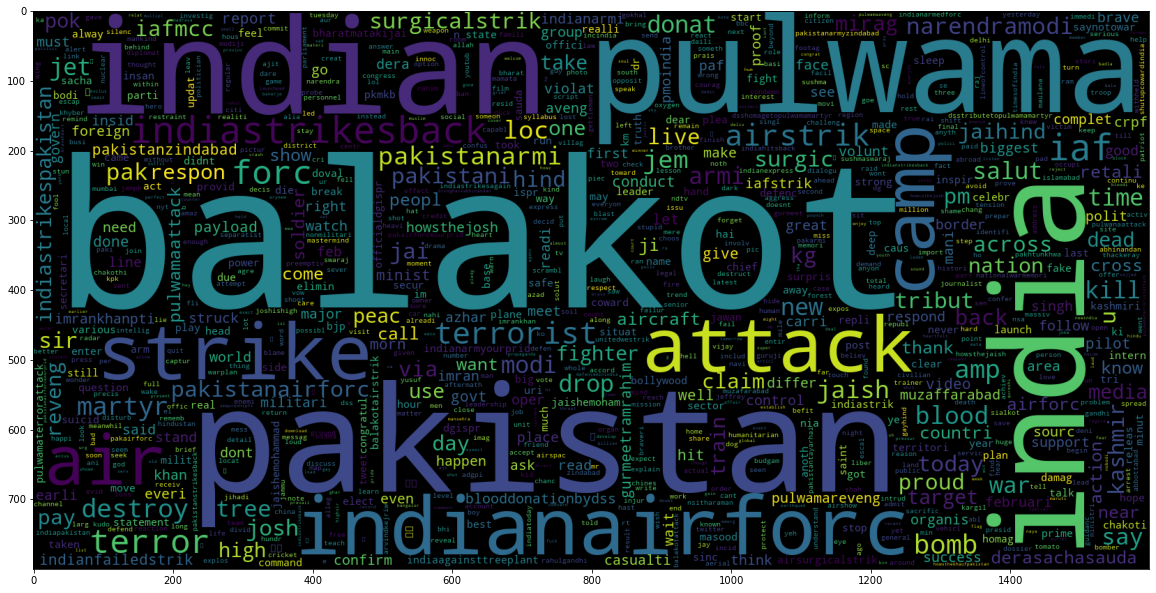

In [174]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(df2['tweet']))
plt.imshow(wc)

In [222]:
df2['blobSentiment'].value_counts()

Neutral     29408
Positive    18178
Negative    10329
Name: blobSentiment, dtype: int64

C:\Users\pk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='blobSentiment', ylabel='count'>

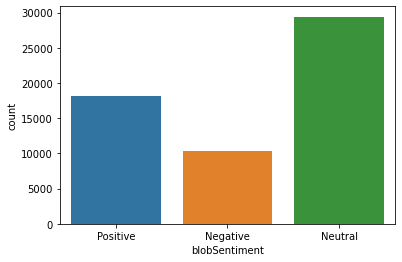

In [223]:
sns.countplot(df2['blobSentiment'])

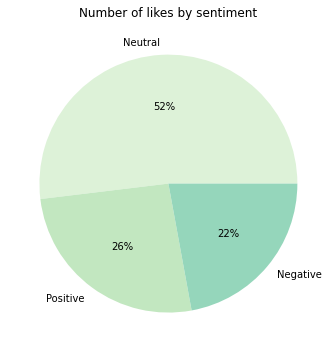

In [226]:
plt.figure(figsize = (10, 5))

data = df2['vadersentiment'].value_counts()
colors = sns.color_palette('GnBu')
labels = ['Neutral', 'Positive', 'Negative']

plt.pie(data, labels = labels, autopct = '%.0f%%', colors = colors)
plt.title('Number of likes by sentiment')

plt.tight_layout()

In [232]:
vNeutral['text'].sample(5).values

array(["Indian aircraft violate Pakistan airspace 'to conduct surgical strike' https://t.co/o09jZ4zBSk",
       'Balakot terror camp: All you need to know https://t.co/VVP3sPwW4N',
       "https://t.co/s5PkQLvb4R\r\n#DSSTributeToPulwamaMartyrs\r\n Inspired by Saint Dr @Gurmeetramrahim Ji millions of Dera volunteers have pledged to donate blood on regular basis. With Guruji's inspiration, DSS is conducting Blood Donation Camps on 27 Feb, to pay tribute to Pulwama martyrs.",
       'Mooh tod jawab happening as promised... \r\n\r\n#Surgicalstrike2 #Balakot #indianairforce #IndiaStrikesBack #AirStrike',
       "We will not just think of retaliation we will retaliate. #PMIK \r\n\r\nHope here isn't ↩️\r\n\r\n#PakAirForce #Balakot"],
      dtype=object)

In [181]:
from collections import Counter

In [233]:
df2['temp_list'] = df2['tweet'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df2['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(50))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

In [185]:
df2.head()

Unnamed: 0                                               text  \
0        4758  Indian aircrafts intruded from Muzafarabad sec...   
1        6693  1000 kgs bombs dropped on terror camps with pi...   
2       53217  I visited mountain area of Jabba 25 km away fr...   
3        1645  We must recognise the sacrifices of our parami...   
4       20358  What an explosive morning ! As india celebrate...   

     user_username              source                created_at  \
0   OfficialDGISPR    Twitter for iPad  2019-02-26T01:36:30.000Z   
1  majorgauravarya  Twitter for iPhone  2019-02-26T03:49:02.000Z   
2      HamidMirPAK  Twitter for iPhone  2019-02-27T09:38:38.000Z   
3      RahulGandhi  Twitter for iPhone  2019-02-25T08:15:27.000Z   
4    TandonRaveena  Twitter for iPhone  2019-02-26T06:30:04.000Z   

                 user_location                 user_name  retweet_count  \
0                     Pakistan                   DG ISPR          10406   
1                        India  Major Gaurav Arya (Retd)          10404   
2          Islamabad, Pakistan                 Hamid Mir           8184   
3  12, Tughlak Lane, New Delhi              Rahul Gandhi           7520   
4                 Planet Earth            Raveena Tandon           3465   

   like_count  quote_count  ...  \
0       40211         2685  ...   
1       34533          669  ...   
2       28732         1178  ...   
3       25055          450  ...   
4       21943          153  ...   

                                               tweet    neg    neu    pos  \
0  indian aircraft intrud muzafarabad sector face...  0.000  1.000  0.000   
1   kgs bomb drop terror camp pin point accuraci ...  0.500  0.413  0.087   
2  visit mountain area jabba  km away balakot tod...  0.348  0.652  0.000   
3  must recognis sacrific paramilitari forc like ...  0.041  0.557  0.402   
4  explos morn  india celebr  salut  braveheart m...  0.291  0.618  0.091   

  compound  vadersentiment  subjectivity  polarity  blobSentiment  \
0   0.0000         Neutral      0.400000  0.100000       Positive   
1  -0.9432        Negative      0.289286 -0.353571       Negative   
2  -0.8625        Negative      0.400000 -0.200000       Negative   
3   0.9062        Positive      0.500000  0.500000       Positive   
4  -0.6705        Negative      0.050000 -0.075000       Negative   

                                           temp_list  
0  [indian, aircraft, intrud, muzafarabad, sector...  
1  [kgs, bomb, drop, terror, camp, pin, point, ac...  
2  [visit, mountain, area, jabba, km, away, balak...  
3  [must, recognis, sacrific, paramilitari, forc,...  
4  [explos, morn, india, celebr, salut, bravehear...  

[5 rows x 24 columns]

In [202]:
df2['pos'].sum()


5345.856

In [203]:
df2['neu'].sum()

42638.05099999999

In [204]:
df2['neg'].sum()


9926.303

In [234]:
df2.to_csv('pbulictweetwithemotions.csv')